### 사과/토마토 이진 분류 (저용량)
- https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

IMAGE_SIZE = 64
BATCH_SIZE = 64

idg = ImageDataGenerator(preprocessing_function=preprocess_input)

original_dir = './datasets/apples_or_tomatoes/original/'
test_dir = './datasets/apples_or_tomatoes/test/'

original_generator = idg.flow_from_directory(original_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='binary', 
                                             shuffle=True)

test_generator = idg.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='binary')

print(original_generator.class_indices)
print(test_generator.class_indices)

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}


In [2]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'apples', 1: 'tomatoes'}

In [3]:
original_target_names = []
test_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

print(original_target_names.__len__(), test_target_names.__len__())

294 97


In [4]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

file_paths target_names  targets
0    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
1    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
2    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
3    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
4    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
..                                                 ...          ...      ...
289  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
290  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
291  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
292  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
293  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1

[294 rows x 3 columns]

file_paths target_names  targets
0   ./datasets/apples_or_tomatoes/test/apples/img_...       apples        0
1   ./datasets/apples_or_tomatoes/test/apples/img_...       apples        0
2   ./datasets/apples_or_tomatoes/test/apples/img_...       apples        0
3   ./datasets/apples_or_tomatoes/test/apples/img_...       apples        0
4   ./datasets/apples_or_tomatoes/test/apples/img_...       apples        0
..                                                ...          ...      ...
92  ./datasets/apples_or_tomatoes/test/tomatoes/im...     tomatoes        1
93  ./datasets/apples_or_tomatoes/test/tomatoes/im...     tomatoes        1
94  ./datasets/apples_or_tomatoes/test/tomatoes/im...     tomatoes        1
95  ./datasets/apples_or_tomatoes/test/tomatoes/im...     tomatoes        1
96  ./datasets/apples_or_tomatoes/test/tomatoes/im...     tomatoes        1

[97 rows x 3 columns]

In [5]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, 
                 random_state=124)

train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

display(train_df)
display(validation_df)

file_paths target_names  targets
0    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
1    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
2    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
3    ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
4    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
..                                                 ...          ...      ...
230  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
231  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
232  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
233  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
234  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1

[235 rows x 3 columns]

file_paths target_names  targets
0   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
1   ./datasets/apples_or_tomatoes/original/apples/...       apples        0
2   ./datasets/apples_or_tomatoes/original/apples/...       apples        0
3   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
4   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
5   ./datasets/apples_or_tomatoes/original/apples/...       apples        0
6   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
7   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
8   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
9   ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
10  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
11  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
12  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
13  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
14  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
15  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
16  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
17  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
18  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
19  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
20  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
21  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
22  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
23  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
24  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
25  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
26  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
27  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
28  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
29  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
30  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
31  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
32  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
33  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
34  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
35  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
36  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
37  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
38  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
39  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
40  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
41  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
42  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
43  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
44  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
45  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
46  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
47  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
48  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
49  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
50  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
51  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
52  ./datasets/

In [7]:
import shutil
import os.path

base_dir = './datasets/apples_or_tomatoes/'


for filepath in train_df.file_paths:
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [8]:
import shutil
import os.path

base_dir = './datasets/apples_or_tomatoes/'


for filepath in validation_df.file_paths:
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    shutil.copy2(filepath, destination)

In [11]:
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

235
59
97


In [9]:
train_df

file_paths target_names  targets
0    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
1    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
2    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
3    ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
4    ./datasets/apples_or_tomatoes/original/apples/...       apples        0
..                                                 ...          ...      ...
230  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
231  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1
232  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
233  ./datasets/apples_or_tomatoes/original/apples/...       apples        0
234  ./datasets/apples_or_tomatoes/original/tomatoe...     tomatoes        1

[235 rows x 3 columns]

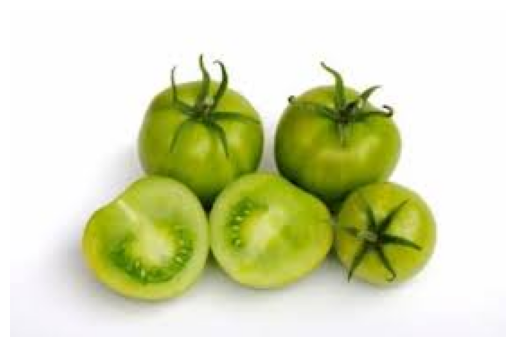

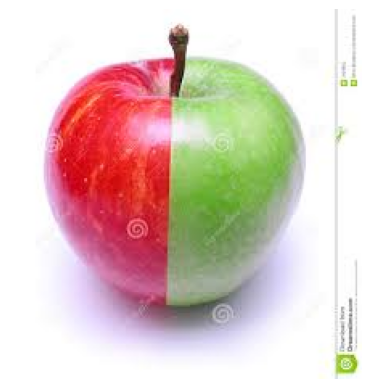

In [13]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[200]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[100]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

### 1️⃣데이터 증강 없이 resnet50 모델로 훈련 진행

In [625]:
IMAGE_SIZE = 64
BATCH_SIZE = 64

train_dir = './datasets/apples_or_tomatoes/train'
validation_dir = './datasets/apples_or_tomatoes/validation/'
test_dir = './datasets/apples_or_tomatoes/test/'

train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True
)

validation_flow = validation_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 235 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}


In [626]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50V2

def create_model(verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(50, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=model.input, outputs=output)
    if verbose:
        model.summary()
        
    return model

In [627]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import BinaryCrossentropy

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

model = create_model(verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_75 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_75[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [628]:
import gc

gc.collect()

22638

In [629]:
history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE, 
                    epochs=20, 
                    validation_data=train_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - acc: 0.6250 - loss: 0.6690 - val_acc: 0.5957 - val_loss: 3.0667 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - acc: 0.8675 - loss: 0.3649 - val_acc: 0.5574 - val_loss: 14.9143 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - acc: 0.8942 - loss: 0.2734 - val_acc: 0.5574 - val_loss: 24.2738 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - acc: 0.9764 - loss: 0.1089 - val_acc: 0.5574 - val_loss: 22.7999 - learning_rate: 1.0000e-04
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - acc: 0.9773 - loss: 0.0812 - val_acc: 0.5574 - val_loss: 20.7547 - learning_rate: 1.0000e-04


In [630]:
model.evaluate(test_flow)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 859ms/step - acc: 0.5430 - loss: 21.7344


[20.839561462402344, 0.5567010045051575]

### 📍증강 없이 소규모 데이터로 학습한 결과
- 손실값이 증가하고, 훈련데이터와 검증데이터의 정확도 차이가 큰 것으로 보아 훈련데이터에 상당히 과적합된 모델임을 확인했다.

### 1️⃣ 데이터 증강 적용 & 4가지 사전 모델 훈련 진행

#### 1. inception

In [26]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 64
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # 에포크 종료 시, 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__()는 전체 데이터 건수에서 batch_size 단위로 나눈 데이터 수를 리턴한다.
    # 예를 들어, 1000개의 데이터를 30 batch_size로 설정하면, 1 batch당 33.33..개 이다.
    # 이 때, 소수점은 무조건 올려서 33 + 1 = 34개로 설정한다.
    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타겟 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size : (index+1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size : (index+1) * self.batch_size]
        
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess는 함수이므로 image를 넣는다.
            # 데이터 증강이 된 이미지일 수도 아닐 수도 있다.
            if self.preprocess is not None:
                image = self.preprocess(image)
                
            results_batch[i] = image

        return results_batch, targets_batch

    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [27]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input)

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_7856\1189677322.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,085 (8.86 MB)

 Trainable params: 2,287,973 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [52]:
import gc

gc.collect()

18972

In [53]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 463ms/step - acc: 0.5728 - loss: 1.0065 - val_acc: 0.5763 - val_loss: 1.5769 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - acc: 0.6093 - loss: 0.7803 - val_acc: 0.6441 - val_loss: 1.8587 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - acc: 0.7502 - loss: 0.5983 - val_acc: 0.6780 - val_loss: 1.5616 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - acc: 0.7609 - loss: 0.5502 - val_acc: 0.6949 - val_loss: 1.4797 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - acc: 0.8039 - loss: 0.3967 - val_acc: 0.6780 - val_loss: 1.8225 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - acc: 0.8584 - loss: 0.3442 - val_acc: 0.7627 - val_loss: 1.4884 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - acc: 0.8327 - loss: 0.3996 - val_acc: 0.7288 - val_loss: 1.6774 - learning_rate: 1.0000e-04
Epoch 8/20
4/4 

In [54]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.7453 - loss: 1.7300


[2.24680233001709, 0.6804123520851135]

#### 2. vgg16

In [193]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=vgg16_preprocess_input)

In [194]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='vgg16', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_32          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 50)                  │          25,6

 Total params: 14,740,389 (56.23 MB)

 Trainable params: 14,740,389 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [195]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [196]:
import gc

gc.collect()

8277

In [197]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - acc: 0.3778 - loss: 18.7460 - val_acc: 0.4407 - val_loss: 16.4785 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - acc: 0.4930 - loss: 10.9276 - val_acc: 0.5593 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - acc: 0.5512 - loss: 0.7596 - val_acc: 0.4407 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - acc: 0.4901 - loss: 0.7753 - val_acc: 0.4407 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - acc: 0.4420 - loss: 0.7739 - val_acc: 0.4407 - val_loss: 0.7055 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - acc: 0.4505 - loss: 0.7035 - val_acc: 0.4407 - val_loss: 0.6973 - learning_rate: 1.0000e-04
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - acc: 0.4761 - loss: 0.6948 - val_acc: 0.5593 - val_loss: 0.6924 - learning_rate: 1.0000e-04
Epoch 8/20
4/4 ━━━━━━━━

In [198]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step - acc: 0.6486 - loss: 0.6764


[0.6836133599281311, 0.5979381203651428]

#### 3. mobilenet

In [217]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

In [219]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_7856\425428241.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_37[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,085 (8.86 MB)

 Trainable params: 2,287,973 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [220]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [221]:
import gc

gc.collect()

57386

In [222]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.5879 - loss: 0.9230 - val_acc: 0.8814 - val_loss: 0.2938 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.8372 - loss: 0.4004 - val_acc: 0.8644 - val_loss: 0.3868 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.9067 - loss: 0.2188 - val_acc: 0.8475 - val_loss: 0.5361 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.9494 - loss: 0.1557 - val_acc: 0.8136 - val_loss: 0.5904 - learning_rate: 1.0000e-04


In [223]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - acc: 0.8500 - loss: 0.4538


[0.46473169326782227, 0.8453608155250549]

#### 4. resnet

In [211]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=resnet50_preprocess_input)

In [212]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_35[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 38, 38, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 38, 38, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 40, 40, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,301 (90.28 MB)

 Trainable params: 23,621,861 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [213]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [214]:
import gc

gc.collect()

15236

In [215]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - acc: 0.6011 - loss: 0.7815 - val_acc: 0.5763 - val_loss: 5.0737 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - acc: 0.7863 - loss: 0.4614 - val_acc: 0.5763 - val_loss: 8.6022 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - acc: 0.8489 - loss: 0.3616 - val_acc: 0.5932 - val_loss: 4.2315 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - acc: 0.8488 - loss: 0.3052 - val_acc: 0.5085 - val_loss: 3.4439 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - acc: 0.9169 - loss: 0.2538 - val_acc: 0.4407 - val_loss: 9.2696 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - acc: 0.9317 - loss: 0.1967 - val_acc: 0.5424 - val_loss: 11.5742 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - acc: 0.9051 - loss: 0.2797 - val_acc: 0.5254 - val_loss: 12.6231 - learning_rate: 1.0000e-04


In [216]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - acc: 0.4305 - loss: 15.3379


[13.13811206817627, 0.5051546096801758]

### 4가지 모델 학습 결과

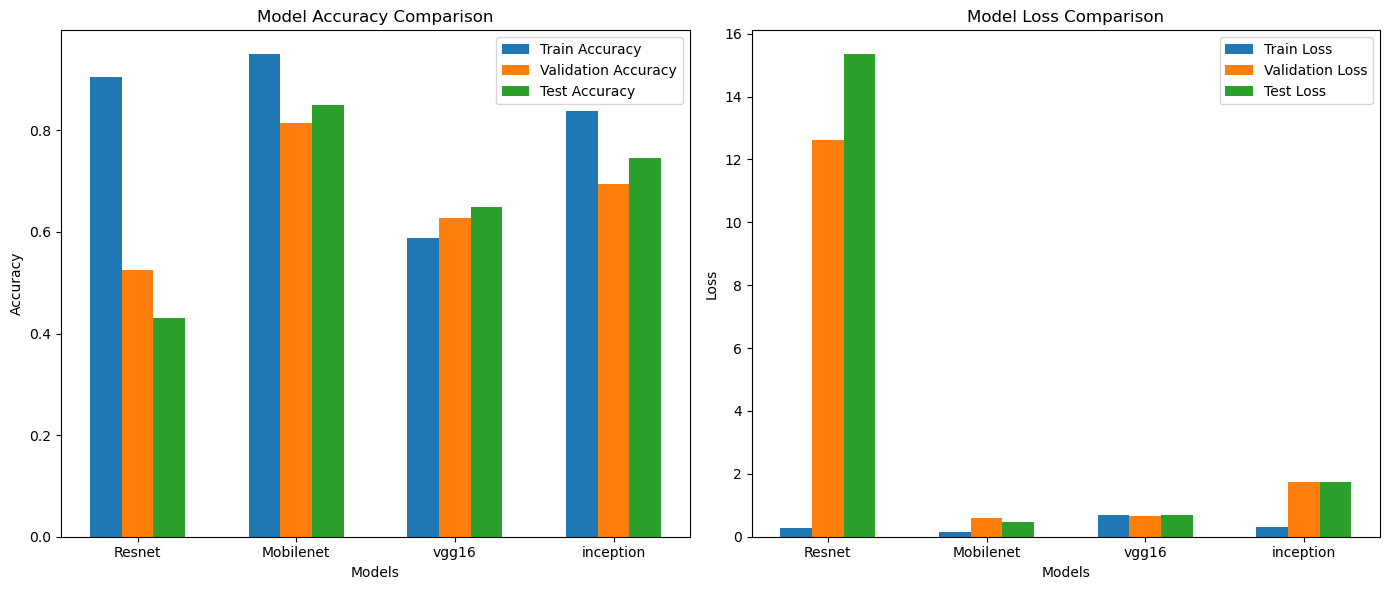

In [631]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름
models = ['Resnet', 'Mobilenet', 'vgg16', 'inception']

# 각 모델의 정확도 및 손실
accuracy = {
    'train': [0.9051, 0.9494, 0.5878, 0.8371],
    'validation': [0.5254, 0.8136, 0.6271, 0.6949],
    'test': [0.4305, 0.8500, 0.6486, 0.7453]
}

loss = {
    'train': [0.2797, 0.1557, 0.6772, 0.3235],
    'validation': [12.6231, 0.5904, 0.6738, 1.7533],
    'test': [15.3379, 0.4534, 0.6764, 1.7300]
}

# x축의 위치
x = np.arange(len(models))

# 막대 너비
bar_width = 0.2

# 정확도 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 정확도 그래프
ax[0].bar(x - bar_width, accuracy['train'], width=bar_width, label='Train Accuracy')
ax[0].bar(x, accuracy['validation'], width=bar_width, label='Validation Accuracy')
ax[0].bar(x + bar_width, accuracy['test'], width=bar_width, label='Test Accuracy')

# 설정
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# 손실 시각화
# 손실 그래프
ax[1].bar(x - bar_width, loss['train'], width=bar_width, label='Train Loss')
ax[1].bar(x, loss['validation'], width=bar_width, label='Validation Loss')
ax[1].bar(x + bar_width, loss['test'], width=bar_width, label='Test Loss')

# 설정
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Loss Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()

### 📍데이터 증강을 적용한 결과
- Resnet, Mobilenet, vgg16, Inception 중 가장 높은 정확도와 가장 낮은 손실값을 나타낸 Mobilenet을 사용하여 이후의 단계를 진행하고자 한다.

| 데이터 세트      | 정확도  | 손실  |
|-----------------|---------|-------|
| 훈련 데이터     | 0.9494  | 0.1557 |
| 검증 데이터     | 0.8136  | 0.5904 |
| 테스트 데이터   | 0.8500  | 0.4538 |

### 2️⃣ 과적합 의심
#### 훈련 데이터와 검증 데이터의 정확도 차이가 0.1이 넘는 것을 확인
- 데이터 수를 늘려 일반화 하게 하기 위한 데이터 증강 추가
- drop out 비율 작게
- l2 규제 사용

In [274]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.5, scale_limit=(-0.8, 1.5), rotate_limit=90, p=0.5, border_mode=cv2.BORDER_CONSTANT),
    A.VerticalFlip(p=0.5),
    A.CLAHE(p=0.5, clip_limit=4)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

In [226]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5))(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [227]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_7856\1225705922.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_38 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_38[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,085 (8.86 MB)

 Trainable params: 2,287,973 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [228]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [229]:
import gc

gc.collect()

47134

In [230]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - acc: 0.6128 - loss: 0.8442 - val_acc: 0.8305 - val_loss: 0.4812 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - acc: 0.8046 - loss: 0.4347 - val_acc: 0.7966 - val_loss: 0.5955 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.7976 - loss: 0.4138 - val_acc: 0.7797 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.8021 - loss: 0.4015 - val_acc: 0.7966 - val_loss: 0.5844 - learning_rate: 1.0000e-04


In [234]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - acc: 0.7446 - loss: 0.6412


[0.5663156509399414, 0.7731958627700806]

### 📍규제 적용 및 더 많은 데이터 증강 결과
- 이전에 비해 정확도는 낮아졌지만 과적합은 해소되었다.

| 모델    | 데이터 세트 | 정확도 | 손실값   |
|---------|-------------|--------|--------|
| 1c      | 훈련 데이터 | 0.9494 | 0.1557 |
|         | 검증 데이터 | 0.8136 | 0.5904 |
|         | 테스트 데이터 | 0.8500 | 0.4538 |
| 2c      | 훈련 데이터 | 0.8021 | 0.4015 |
|         | 검증 데이터 | 0.7966 | 0.5844 |
|         | 테스트 데이터 | 0.7446 | 0.6412 |

- 마지막으로 정확도를 올리기 위해 이미지 사이즈를 조정해보고자 한다.

### 3️⃣ 이미지 사이즈 키우기

In [570]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

train_dir = './datasets/apples_or_tomatoes/train'
validation_dir = './datasets/apples_or_tomatoes/validation/'
test_dir = './datasets/apples_or_tomatoes/test/'

train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True
)

validation_flow = validation_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 235 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}


In [571]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.5, scale_limit=(-0.8, 1.5), rotate_limit=90, p=0.5, border_mode=cv2.BORDER_CONSTANT),
    A.VerticalFlip(p=0.5),
    A.CLAHE(p=0.5, clip_limit=4)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

In [601]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-5))(x) # 유닛 수 증가
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-5))(x) # 유닛 수 증가
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [602]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 클래스 가중치를 계산합니다.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_7856\1079107499.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_73 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_73[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,455,233 (9.37 MB)

 Trainable params: 2,421,121 (9.24 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [603]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [604]:
import gc

gc.collect()

96343

In [606]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    class_weight=class_weights,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - acc: 0.5632 - loss: 0.7017 - val_acc: 0.6949 - val_loss: 0.5312 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - acc: 0.7816 - loss: 0.4580 - val_acc: 0.7966 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - acc: 0.8312 - loss: 0.4193 - val_acc: 0.7288 - val_loss: 0.7217 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - acc: 0.8513 - loss: 0.3314 - val_acc: 0.8475 - val_loss: 0.4911 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - acc: 0.8753 - loss: 0.2889 - val_acc: 0.8305 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - acc: 0.8391 - loss: 0.3492 - val_acc: 0.8136 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - acc: 0.8767 - loss: 0.2721 - val_acc: 0.8983 - val_loss: 0.4749 - learning_rate: 1.0000e-04
Epoch 8/20
4/4 ━━━━━━━━━━━━━━

In [607]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - acc: 0.8794 - loss: 0.3400


[0.40059491991996765, 0.8659793734550476]

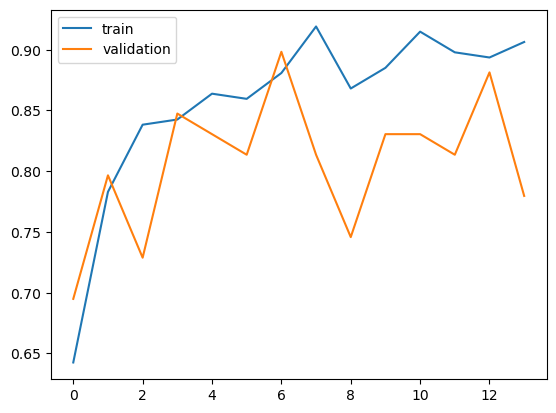

In [608]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

### 📍 이미지 사이즈 64 -> 224 결과
- 이전 정확도에 비해 훈련, 테스트, 검증 데이터의 정확도 모두 상승하였다.

| 데이터 세트 | 이전 | 현재   |
-------------|--------|--------|
| 훈련 데이터 | 0.8021 | 0.9138 |
| 검증 데이터 | 0.7966 | 0.8814 |
| 테스트 데이터 | 0.7446 | 0.8794 |

- 해당 모델로 실제 예측을 진행해보고자 한다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


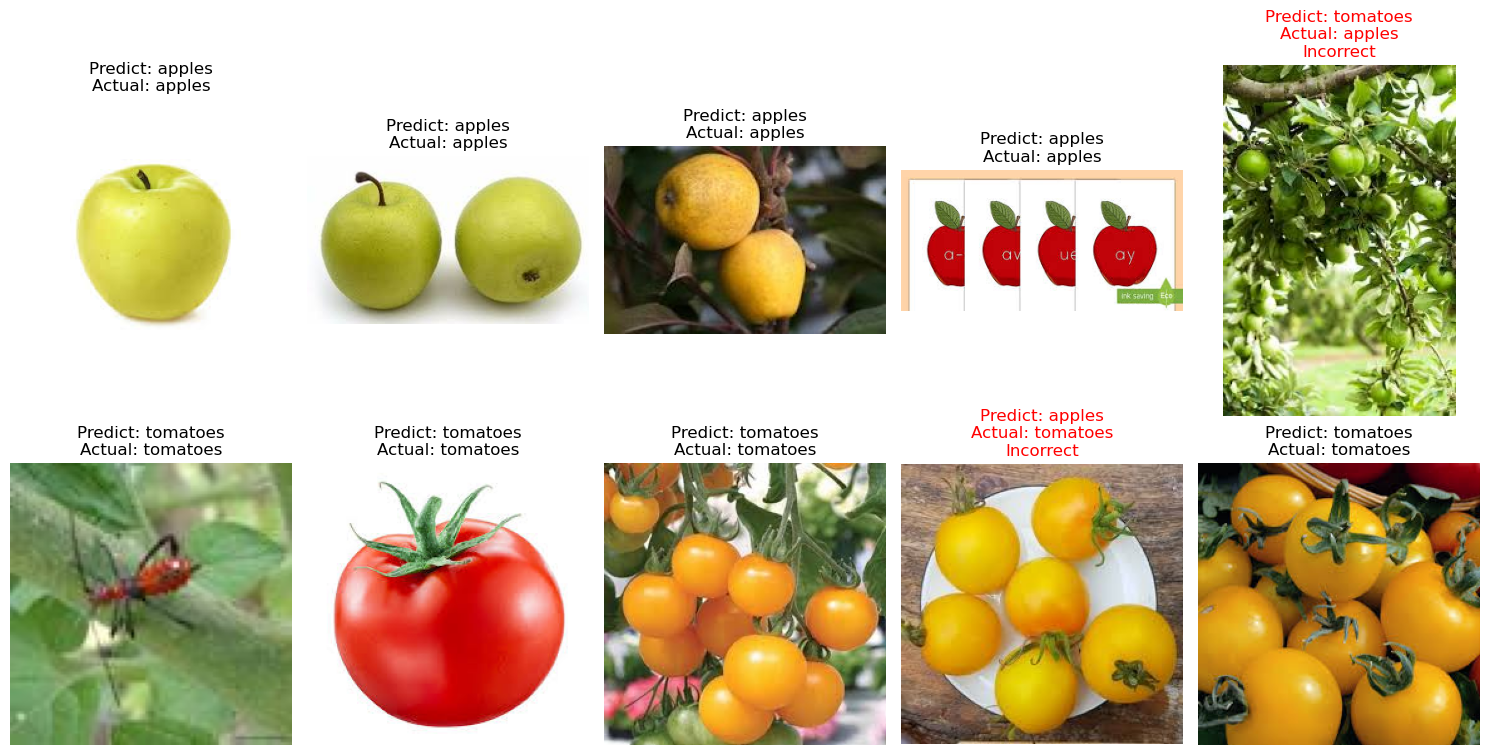

In [618]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def preprocess_image(image_path, IMAGE_SIZE):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = np.expand_dims(resized_image, axis=0)
    resized_image = resized_image / 255.0  # 이미지 스케일링
    return resized_image

plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image)
    predicted_class = 1 if predictions[0][0] > 0.5 else 0
    predicted_class_name = class_names[predicted_class]
    
    # 이미지를 시각화
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, idx + 1)  
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')

plt.tight_layout()
plt.show()

### 📍실제 예측 결과
- 무작위로 10개의 이미지를 가져와서 예측을 진행해보았다.
- 10개 중 2개는 틀린 예측을 하였지만 80프로 이상의 정확도를 보이는 모델이 학습되었다.
- 해당 데이터는 소규모 데이터였기 때문에, 구조가 복잡한 resnet모델에서는 다른 사전 훈련 모델들에 비해, 낮은 정확도와 높은 손실값을 보였었다.
- 따라서, 해당 데이터는 적은 수의 파라미터로도 높은 성능을 나타낼 수 있는 경량화된 모델인 mobilenet을 사용하여 좋은 모델을 훈련 시킬 수 있었다.

In [560]:
IMAGE_SIZE = 32
BATCH_SIZE = 64

train_dir = './datasets/apples_or_tomatoes/train'
validation_dir = './datasets/apples_or_tomatoes/validation/'
test_dir = './datasets/apples_or_tomatoes/test/'

train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True
)

validation_flow = validation_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 235 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}
{'apples': 0, 'tomatoes': 1}


In [561]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values  

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values  

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values   

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.5, scale_limit=(-0.8, 1.5), rotate_limit=90, p=0.5, border_mode=cv2.BORDER_CONSTANT),
    A.VerticalFlip(p=0.5),
    A.CLAHE(p=0.5, clip_limit=4)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobilenet_preprocess_input)

In [562]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet': 
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5))(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.3)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [563]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model = create_model(model_name='mobilenet', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_7856\1225705922.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_69 (InputLayer)   │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 16, 16, 32)        │             864 │ input_layer_69[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 16, 16, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 16, 16, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 16, 16, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 16, 16, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 16, 16, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 16, 16, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 16, 16, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 16, 16, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 16, 16, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 16, 16, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 17, 17, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 8, 8, 96)          │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,085 (8.86 MB)

 Trainable params: 2,287,973 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [564]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [565]:
import gc

gc.collect()

80528

In [566]:
N_EPOCHS = 20

history = model.fit(train_dataset, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 632ms/step - acc: 0.4649 - loss: 1.1593 - val_acc: 0.5763 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - acc: 0.5544 - loss: 1.1485 - val_acc: 0.5932 - val_loss: 0.6707 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - acc: 0.6376 - loss: 0.7864 - val_acc: 0.5593 - val_loss: 0.7761 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - acc: 0.5747 - loss: 0.9675 - val_acc: 0.5593 - val_loss: 0.7375 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - acc: 0.5862 - loss: 0.8383 - val_acc: 0.5424 - val_loss: 0.7117 - learning_rate: 1.0000e-04


In [567]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc: 0.6403 - loss: 0.6454


[0.7186810970306396, 0.5463917255401611]

In [568]:
def preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = np.expand_dims(resized_image, axis=0)
    resized_image = resized_image / 255.0  # 스케일링
    return resized_image

# 이미지 전처리 및 예측
image_path = './datasets/apple_test.jpg'
preprocessed_image = preprocess_image(image_path)

# 예측 수행
prediction = model.predict(preprocessed_image)
predicted_class = 1 if prediction[0][0] > 0.5 else 0

# 클래스 이름 설정
class_names = ['사과', '토마토']

# 결과 출력
print(class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
사과


In [480]:
def preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    resized_image = np.expand_dims(resized_image, axis=0)
    resized_image = resized_image / 255.0  # 스케일링
    return resized_image

# 이미지 전처리 및 예측
image_path = './datasets/tomato_test.jpg'
preprocessed_image = preprocess_image(image_path)

# 예측 수행
prediction = model.predict(preprocessed_image)
predicted_class = 1 if prediction[0][0] > 0.5 else 0

# 클래스 이름 설정
class_names = ['사과', '토마토']

# 결과 출력
print(class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
토마토


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


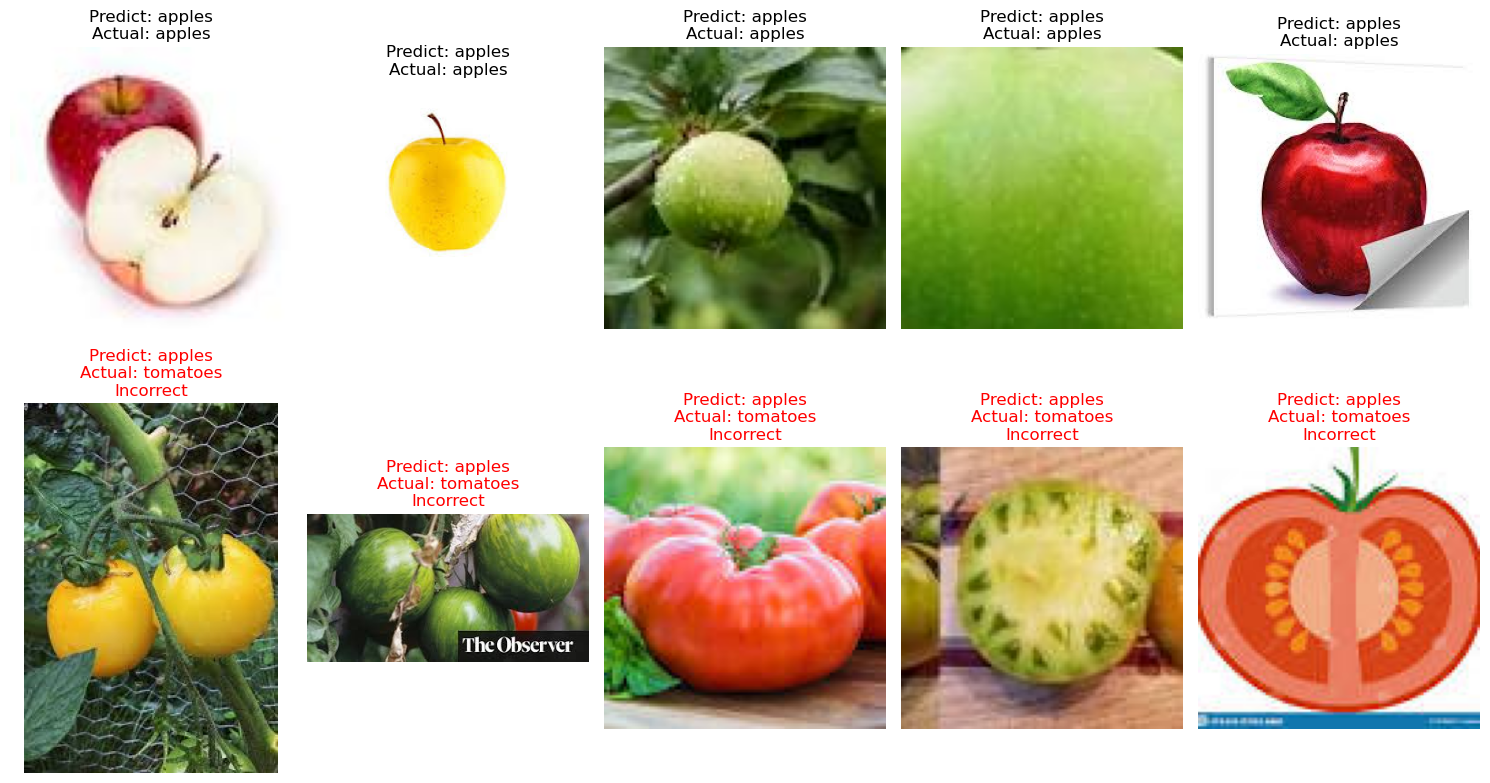

In [569]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

# 이미지 로드 및 전처리
IMAGE_DIR = './datasets/apples_or_tomatoes/original/'
IMAGE_SIZE = 224
class_names = ['apples', 'tomatoes']

def load_random_images(image_dir, class_names, num_images=10):
    images_per_class = num_images // len(class_names)
    remainder = num_images % len(class_names)

    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
        selected_images = random.sample(all_images, min(images_per_class, len(all_images)))

        images.extend(selected_images)
        labels.extend([class_name] * len(selected_images))

    # 추가로 필요한 이미지를 무작위로 선택
    if remainder > 0:
        additional_images = []
        additional_labels = []
        for class_name in class_names:
            class_dir = os.path.join(image_dir, class_name)
            all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpeg')]
            additional_images.extend(random.sample(all_images, min(remainder, len(all_images))))
            additional_labels.extend([class_name] * min(remainder, len(all_images)))
            remainder -= len(additional_images)
            if remainder <= 0:
                break
        images.extend(additional_images)
        labels.extend(additional_labels)

    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = preprocess_input(resized_image)
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 10개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=10)

# Predict and visualize the results
plt.figure(figsize=(15, 8))  
for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=8)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    # Visualize the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, idx + 1)  # Visualize the images in a 4x4 grid
    plt.imshow(image)
    actual_class_name = random_labels[idx]
    title_text = f"Predict: {predicted_class_name}\nActual: {actual_class_name}"
    if predicted_class_name != actual_class_name:
        title_text += "\nIncorrect"
        plt.title(title_text, color='red')  # 틀린 예측은 빨간색으로 표시
    else:
        plt.title(title_text)
    plt.axis('off')
plt.tight_layout()
plt.show()